# Lab 4: k-NN

In this lab, we will explore classification with the k-Nearest Neighbors (k-NN) classifier. We will first use k-NN to perform classification on a synthetic dataset and then to recognize images of hand-written digits.


Your first objective is to create a toy dataset in order to understand how k-NN works. The dataset will consist of $200$ points in the $2$-dimensional space ($N = 200$, $d = 2$). Each point will belong to a specific class and there will be $4$ classes in total (classes $1,2,3$ and $4$). Each class will contain exactly $50$ points. For each class, points will be drawn from a specific Gaussian distribution. For points belonging to class $1$, use a Gaussian distribution with mean [$1,1$] and standard deviation $0.5$. For points belonging to class $2$, a Gaussian distribution with mean [$1,-1$] and standard deviation $0.5$. For points belonging to class $3$, a Gaussian distribution with mean [$-1,1$] and standard deviation $0.5$. Finally, for points belonging to class $4$, use a Gaussian distribution with mean [$-1,-1$] and standard deviation $0.5$. To generate these values make use of the `randn` function (https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randn.html) that returns a sample from the 'standard normal' distribution as follows: 

```python
sigma * np.random.randn(...) + mu
```

In [1]:
import numpy as np

N = 200 # number of points
d = 2 # number of dimensions

X = np.zeros((N,d))
y = np.zeros(N)

mu = np.array([1, 1]) # mean
sigma = 0.5 # standard deviation

for i in range(N//4):
    X[i,:] = sigma * np.random.randn(2) + mu
    #X[i,:] =np.random.normal(mu, sigma, 2)
    y[i] = 1

mu = np.array([1, -1]) # mean
sigma = 0.5 # standard deviation

for i in range(N//4, N//2):
    X[i,:] = sigma * np.random.randn(2) + mu
    #X[i,:] =np.random.normal(mu, sigma, 2)
    y[i] = 2
    
mu = np.array([-1, 1]) # mean
sigma = 0.5 # standard deviation
    
for i in range(N//2, 3*N//4):
    X[i,:] = sigma * np.random.randn(2) + mu
    #X[i,:] =np.random.normal(mu, sigma, 2)
    y[i] = 3
    
mu = np.array([-1, -1]) # mean
sigma = 0.5 # standard deviation
    
for i in range(3*N//4, N):
    X[i,:] = sigma * np.random.randn(2) + mu
    #X[i,:] =np.random.normal(mu, sigma, 2)
    y[i] = 4

After generating the $200$ points, plot them in a $2$-dimensional plane using `scatter` (http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter). Set the colors of points belonging to classes $1,2,3$ and $4$ to blue, red, green and yellow respectively.

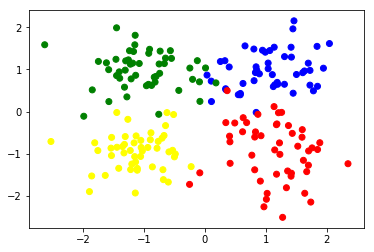

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap        
cmap_bold = ListedColormap(['blue', 'red', 'green', 'yellow'])
        
plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold)

Perform k-NN on the generated dataset to classify the $200$ points to the $4$ classes using $k=3$. Use the `KNeighborsClassifier` function provided by `scikit-learn` (http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). Measure the performance of the k-NN classifier by computing its accuracy. To do this, you can use the `accuracy_score` function of `scikit-learn` (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html). 

In [3]:
from sklearn.neighbors import KNeighborsClassifier

k = 3

clf = KNeighborsClassifier(k)
clf.fit(X, y)

y_pred = clf.predict(X)

from sklearn.metrics import accuracy_score

print(accuracy_score(y, y_pred))

0.98


What do you observe? Did k-NN manage to correctly classify all points?

Run the following code to plot the decision boundaries for each class.

Text(0.5, 1.0, '4-Class classification (k = 3)')

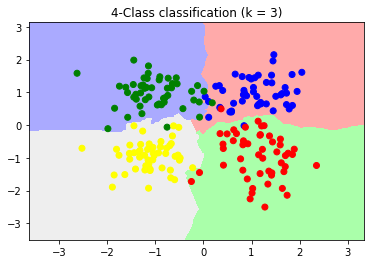

In [4]:
from matplotlib.colors import ListedColormap

h = .02  # step size in the mesh

# Create color map
cmap_custom = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#EEEEEE'])


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_custom)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("4-Class classification (k = %i)" % k)

Experiment with different values of k and observe how the decision boundaries of the $4$ classes are affected.

---

Your next task is to write your own k-NN classifier. First, write a function that computes the `euclidean distance` between a pair of points. Given two datapoints $\mathbf{x}$ and $\mathbf{z}$, their euclidean distance is defined as:

$$ d(\mathbf{x},\mathbf{z}) = \sqrt {\sum_{i=1}^d (\mathbf{x_i}-\mathbf{z}_i)^2} $$

In [5]:
from math import sqrt
def euclideanDistance(vectorA, vectorB):
    # Computes the euclidean distance between two vectors. The
    # two vectors must have the same size.iiii8p
    
    return sqrt(sum((vectorA-vectorB)**2))

Write another function that takes as input the training data $\mathbf{X}$, their class labels $\mathbf{y}$, the parameter $k$ and a datapoint $\textbf{z}$ and returns the predicted class for $\textbf{z}$ using k-NN. In case of ties, assign $\textbf{z}$ randomly to one of the classes.

In [6]:
from collections import Counter

def kNN(k, X, y, z):
    # Assigns to the test instance the label of the majority of the labels of the k closest 
    # training examples using the k-NN with euclidean distance.

    distances = np.zeros(n)
    for i in range(n):
        distances[i] = euclideanDistance(X[i,:], z)

    idx = distances.argsort()
    y = y[idx]
    label, _ = Counter(y[:k]).most_common()[0]
    
    return label

Use the two functions that you created to perform classification on the training set with $k=3$. Compute the accuracy achieved by your classifier.

In [7]:
n = X.shape[0]
k = 3

for i in range(n):
    y_pred[i] = kNN(k, X, y, X[i,:])
    
    
print(accuracy_score(y, y_pred))

0.98


Is the accuracy equal to the one achieved by the k-NN classifier of `scikit-learn`?

---

We will next use the k-NN classifier to recognize a set of hand-written digits. We will employ a dataset consisting of $1797$ images that is available from `scikit-learn` (http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html). Each image corresponds to a hand-written digit and its dimensionality is $8 \times 8$.  All the images have been already transformed into vectors of dimensionality $64$ and are in the traditional tabular form.

Run the following code to load the dataset and to plot the first ten digits.

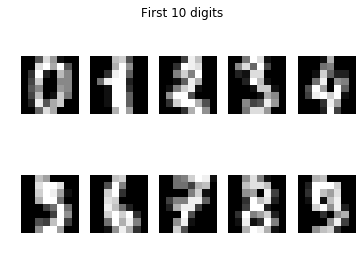

In [8]:
from sklearn import datasets

digits = datasets.load_digits()

X = digits.data
y = digits.target

# Show the first ten digits
fig = plt.figure()
fig.suptitle('First 10 digits')
for i in range(10):
    a = fig.add_subplot(2,5,i+1)
    plt.imshow(X[i,:].reshape(8,8), cmap=plt.cm.gray)
    plt.axis('off')

Your next task is to split the dataset into a training and a test set. To do this, use the function `train_test_split` of `scikit-learn` (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Set the test size equal to $\frac{4}{10}$ of the whole dataset.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

Use k-NN to recognize the hand-written digits of the test set. Compute the classification accuracy, and generate a text summary of the precision, recall and F$1$-score for each class. Use the `classification_report` function of `scikit-learn` (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

In [10]:
k = 3

clf = KNeighborsClassifier(k)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [11]:
from sklearn.metrics import classification_report

print("Classification accuracy: %s\n" % accuracy_score(y_test, y_pred))
print("Classification report:\n%s\n" % classification_report(y_test, y_pred))

Classification accuracy: 0.9888734353268428

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       0.97      1.00      0.99        72
           2       1.00      1.00      1.00        66
           3       0.99      1.00      0.99        71
           4       0.99      1.00      0.99        78
           5       0.99      0.99      0.99        83
           6       0.99      1.00      0.99        69
           7       1.00      0.99      0.99        71
           8       0.98      0.97      0.98        65
           9       0.99      0.95      0.97        77

   micro avg       0.99      0.99      0.99       719
   macro avg       0.99      0.99      0.99       719
weighted avg       0.99      0.99      0.99       719




Compute the classification accuracy for different values of $k$ and plot them in a $2$d plane using plot (http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot).

In [12]:
k = 30
accuracies = np.zeros(len(range(1,k)))

for i in range(1,k):

    clf = KNeighborsClassifier(i)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracies[i-1] = accuracy_score(y_test, y_pred)
    

Text(0, 0.5, 'accuracy')

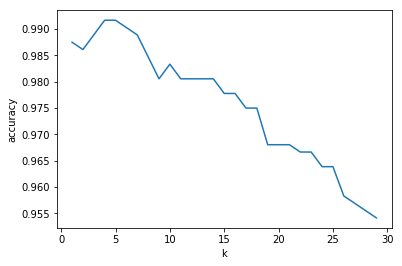

In [13]:
plt.plot(range(1,k), accuracies)
plt.xlabel('k')
plt.ylabel('accuracy')

What do you observe?